In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as stats


In [40]:
#recupération de la variable 

df_clean = pd.read_pickle('df_clean.pkl')

df_clean

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Normalisation du jeu de données

In [41]:
df_clean['smoker']= (df_clean['smoker']=="yes").astype(int)
df_clean['sex']= (df_clean['sex']=='male').astype(int)
for region in df_clean['region'].unique():
    r = f'is_{region}'
    df_clean[r] = 0
    df_clean.loc[df_clean['region'] == region, r] = 1
df_clean.drop('region', axis=1, inplace=True)
df_clean

,age,sex,bmi,children,smoker,charges,is_southwest,is_southeast,is_northwest,is_northeast
0,19,0,27.900,0,1,16884.92400,1,0,0,0
1,18,1,33.770,1,0,1725.55230,0,1,0,0
2,28,1,33.000,3,0,4449.46200,0,1,0,0
3,33,1,22.705,0,0,21984.47061,0,0,1,0
4,32,1,28.880,0,0,3866.85520,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,0,1,0
1334,18,0,31.920,0,0,2205.98080,0,0,0,1
1335,18,0,36.850,0,0,1629.83350,0,1,0,0
1336,21,0,25.800,0,0,2007.94500,1,0,0,0


<Axes: >

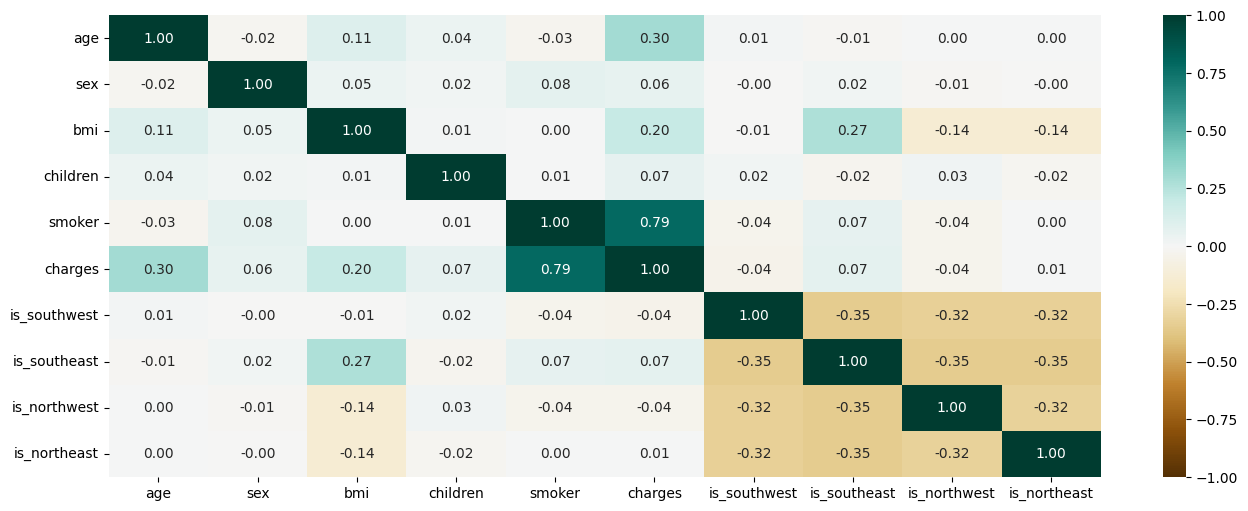

In [47]:

plt.figure(figsize=(16, 6))
sns.heatmap(df_clean.corr(method='pearson'), vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='BrBG')

Nous remarquons plusieurs correlations avec la target :
- charges/smoke 0.79
- charges/age 0.3
- charges/bmi 0.20

De plus, nous observons une corrélation entre deu variables "indépendantes":
- region southeast/bmi

Par conséquent, nous procéderons de la manière suivante:

- Représentation ScatterPlot pour l'annalyse charges/age et charges/bmi
- Confirmation de la relation via Anova pour charges/smoke et region southeast/bmi




<Axes: title={'center': 'charges'}, xlabel='sex'>

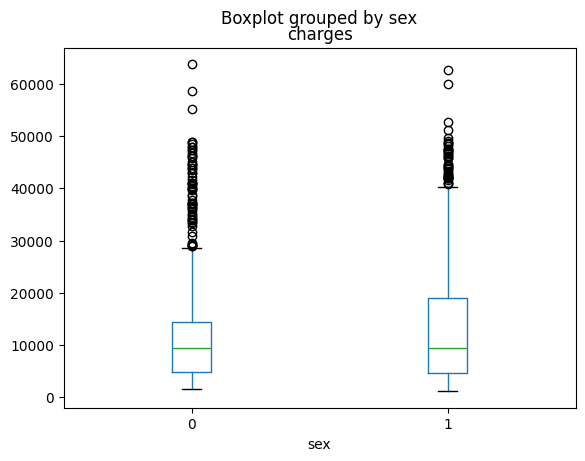

In [46]:
df_clean.boxplot('charges',by='sex', grid=False)